# HaReBaD set of colormaps

The method presented here has been developed to enhance the representation of Fast Ripples (FR) in time-frequency space (scalograms). This method is called HaReBaD for "Halyzia Referential Based Delineated" colormaps. It is divided into two parts.

The first part is based on Shepard's inverse distance, with the aim of coloring portions of high relative magnitude in the image. The magnitude within each scalogram is compared to a reference obtained by calculating the scalograms of nearly 12,000 FR recorded on hybrid (macro/micro) intracerebal EEG (iEEG) of drug resistant epileptic patients. The higher the magnitude of an event compared to this reference, the warmer its color.

The second part consists in creating a delimitation between the "useful" parts of the signal, i.e. those with oscillations strongly represented in the frequency bands of interest, and the "inactive" parts, i.e. those where the frequency distribution is rather homogeneous.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import ListedColormap

# 1. HaReBaD - Defining a set of colormaps

This first block of definitions allows to generate a 3-dimensional space (shape = [cmap_length, n_cmaps, rgb]) containing _**`n`**_ color matrices. _**`n`**_ is the amount of colors chosen by the user. Here it will be five colors : blue, cyan, red, yellow and red.

In [2]:
from modules.colormaps import create_custom_colormatrix_3D, lerp

print("\nStarting process. This operation might take a few seconds.\n")
HaReBaD_color_matrix_upper = create_custom_colormatrix_3D(n_cmaps=1000, cmap_length=600)
print("Done")



Starting process. This operation might take a few seconds.

There are 1000 color matrices of shape (600,4)
Done


The following block of definition allows (1) to create a color map usable by matplotlib from the color matrices obtained using the previous definitions; (2) to obtain the color bar of all the colors available in the 3-dimensional space of the color maps; (3) to generate an image that we will use to illustrate the variation of the available colors on concreate examples.

In [3]:
from modules.plot_utils import create_cmap, get_all_cmaps, create_image

## Quick view of all the available color maps

In [4]:
from modules.interpolation import create_custom_colormatrix_2D

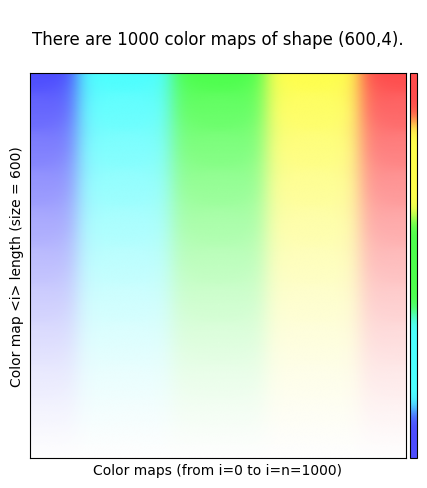

In [5]:

from modules.plots import show_all_available_colormaps, show_individual_example

all_colormaps = get_all_cmaps(HaReBaD_color_matrix_upper)
show_all_available_colormaps(HaReBaD_color_matrix_upper, all_colormaps)

## Application example 1

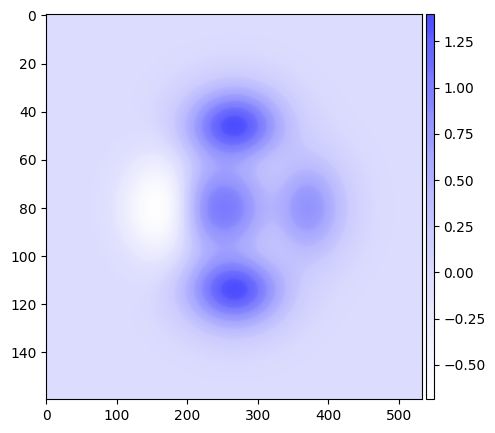

In [6]:
color_map_i = 1
color_map = ListedColormap(HaReBaD_color_matrix_upper[:, color_map_i, :][::-1])
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

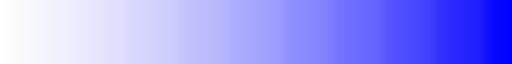

In [7]:
color_map

## Application example 2

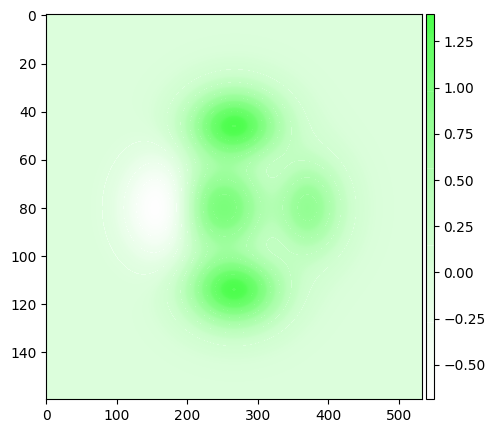

In [8]:
color_map_i = int(HaReBaD_color_matrix_upper.shape[1]/2)
color_map = ListedColormap(HaReBaD_color_matrix_upper[:, color_map_i, :][::-1])
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

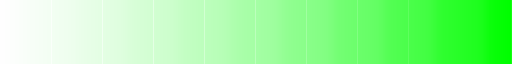

In [9]:
color_map

## Application example 3

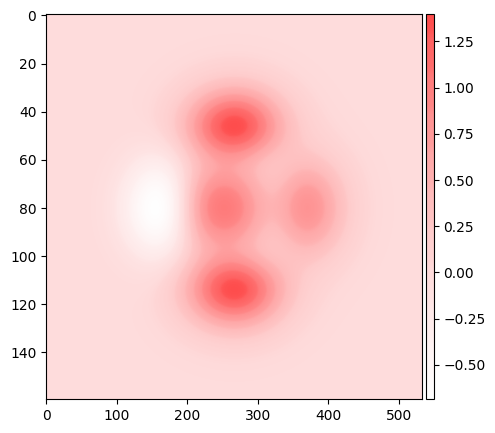

In [10]:
color_map_i = int(HaReBaD_color_matrix_upper.shape[1]-1)
color_map = ListedColormap(HaReBaD_color_matrix_upper[:, color_map_i, :][::-1])
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

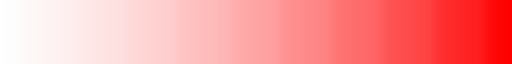

In [11]:
color_map

## Application multiple-examples 4

Apply a linear variation of _**`w`**_ to pick a color map in the 3D color matrix.

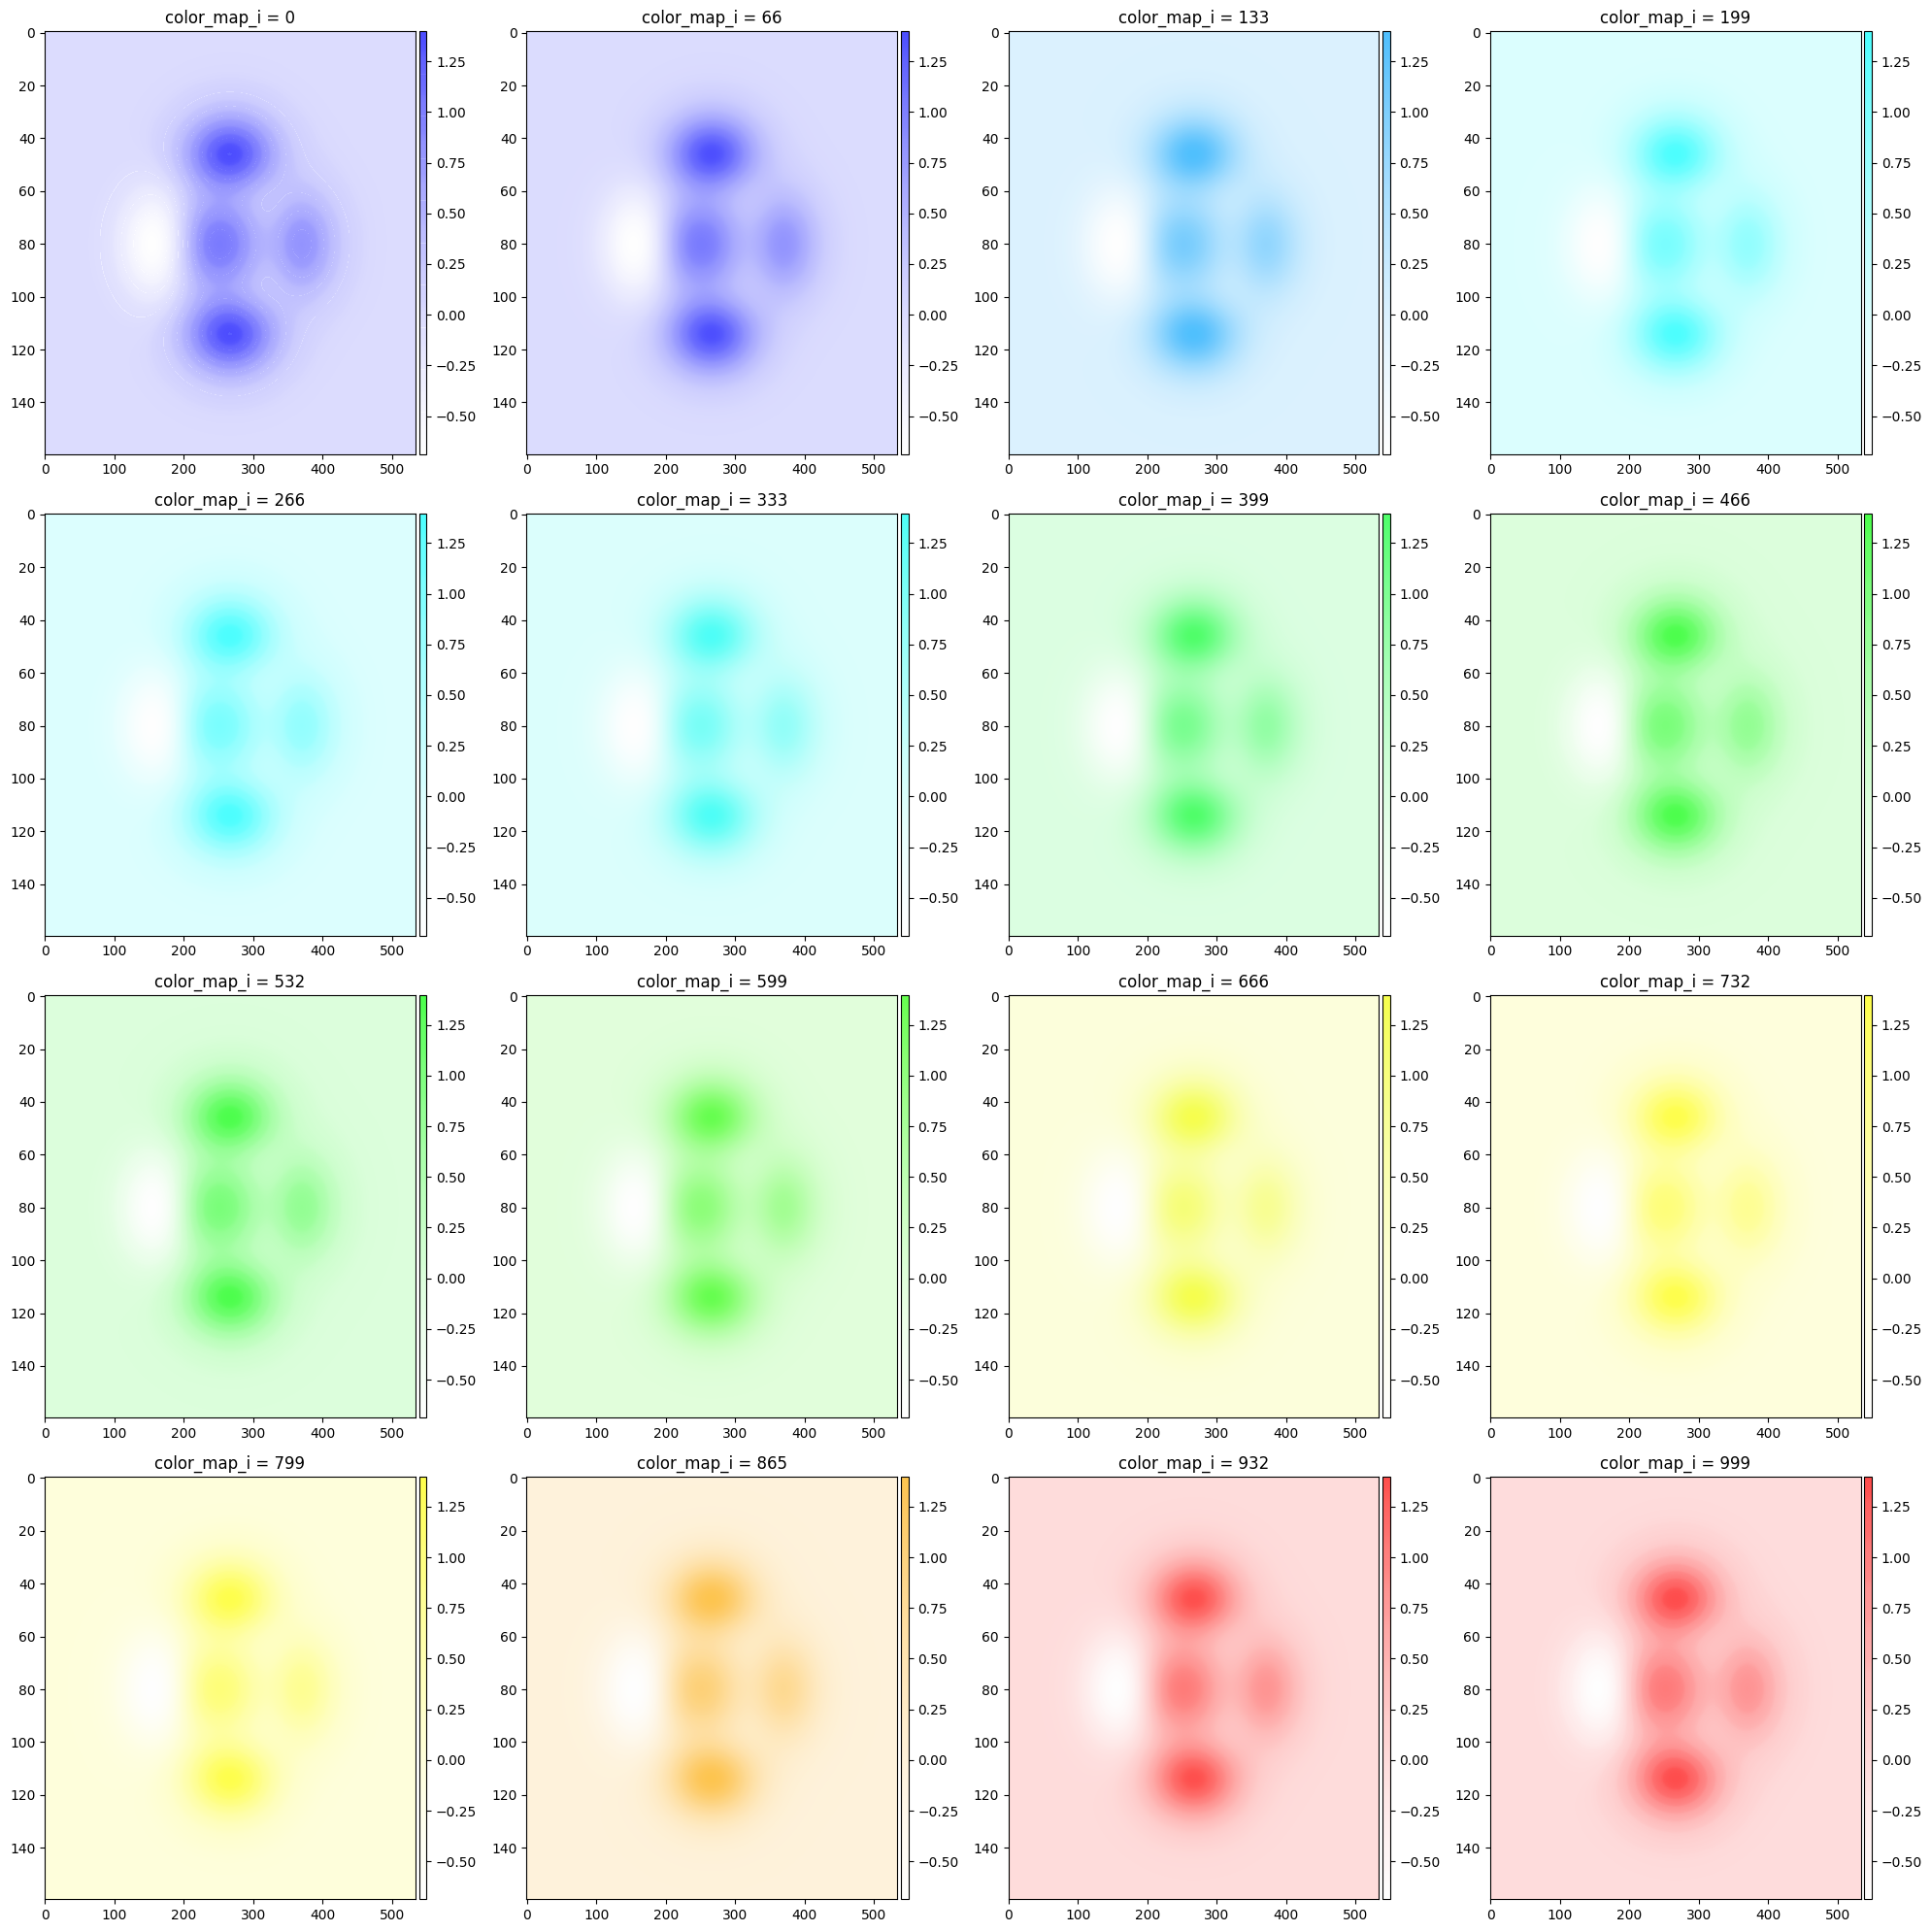

In [12]:
# HaReBaD_color_matrix_upper = np.random.rand(10, 1001, 3)

# Création d'une grille de 4x4 plots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
color_map_indices = np.linspace(0, 999, 16, dtype=int)

for ax, color_map_i in zip(axes.flat, color_map_indices):
    color_map = ListedColormap(HaReBaD_color_matrix_upper[:, color_map_i, :][::-1])
    show_individual_example(color_map, ax)
    ax.set_title(f'color_map_i = {color_map_i}')

plt.tight_layout()
plt.show()

# 2. HaReBaD - Creating a gray-black-gray-white colormap

This second block of definitions allows to generate a customizable color matrix in 2 dimensions (shape = [cmap_length, rgb]). This color matrix can be concatenated with an _**`i`**_ color matrix of the 3 dimensional space defined previously. The assembly of these color matrices allows to create the delineation and the "transparency" effect around the high intensity pixels of the image.

In [13]:
# Création de la colormatrix personnalisée
colormatrix = create_custom_colormatrix_2D(cmap_length=600)

# Dupliquer la colormatrix et la transformer
HaReBaD_color_matrix_lower = np.tile(colormatrix, (HaReBaD_color_matrix_upper.shape[1], 1, 1))
HaReBaD_color_matrix_lower = np.swapaxes(HaReBaD_color_matrix_lower, 0, 1)
HaReBaD_color_matrix_lower = np.rot90(HaReBaD_color_matrix_lower, 2)


Created an image (gray-black-gray-white) with shape: (640, 4).


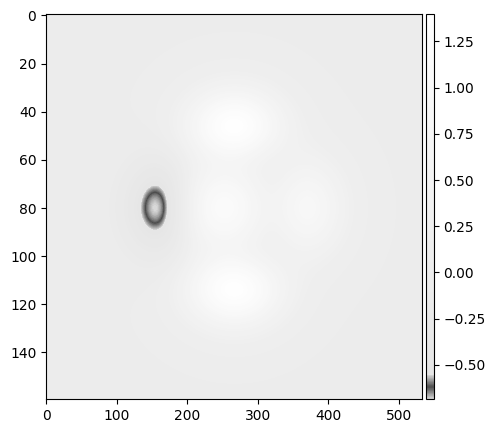

In [14]:
color_map = ListedColormap(colormatrix)
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

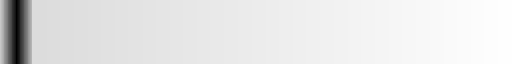

In [15]:
color_map

# 3. HaReBaD - Merge part 1 and part 2.

## Plot the new colormap at the bottom of the previous one

HaReBaD_color_matrix_upper shape: (600, 1000, 4)
HaReBaD_color_matrix_lower shape: (640, 1000, 4)


[]

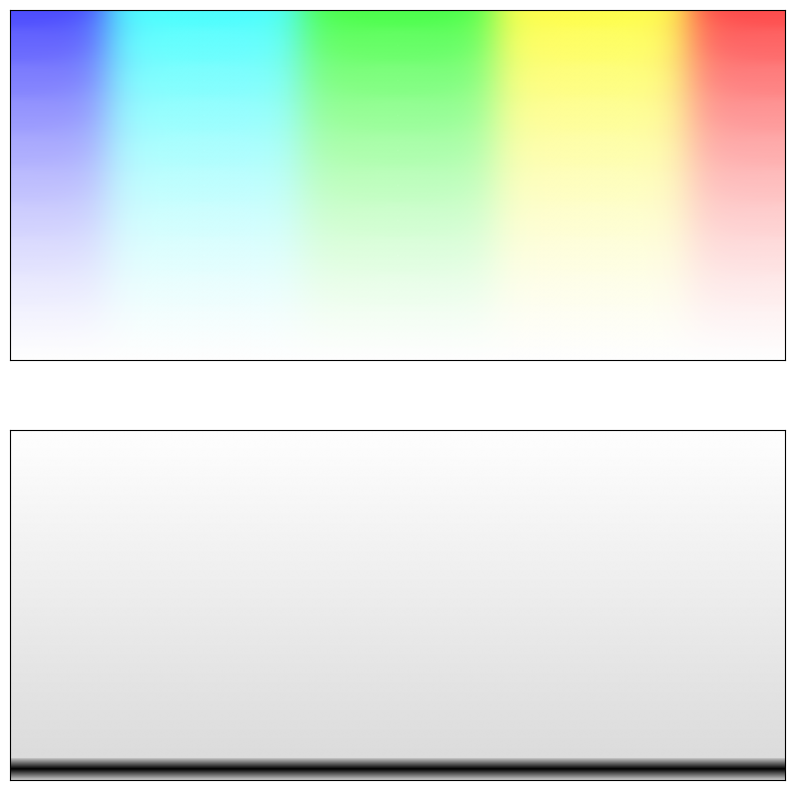

In [16]:
combine_two_cmaps = True

HaReBaD_color_matrix_upper = np.array(HaReBaD_color_matrix_upper)
print(f"HaReBaD_color_matrix_upper shape: {HaReBaD_color_matrix_upper.shape}")
print(f"HaReBaD_color_matrix_lower shape: {HaReBaD_color_matrix_lower.shape}")

### Create figure
f, ax = plt.subplots(nrows=2, figsize= (10,10))

### Plot 3D color matrix
ax[0].imshow(HaReBaD_color_matrix_upper, cmap = all_colormaps, alpha = 0.7, 
           interpolation = 'bilinear', aspect = "auto")
ax[0].set_yticks([])
ax[0].set_xticks([])

### Plot 2D color matrix
ax[1].imshow(HaReBaD_color_matrix_lower,aspect="auto",cmap=color_map)
ax[1].set_yticks([])
ax[1].set_xticks([])

## Combine the two colormaps in a unique RGBA matrix

In [17]:
HaReBaD_color_matrix_full = [] #combined_color_matrices
HaReBaD_color_maps_list = [] #combined_color_maps

for i, w in enumerate(np.arange(0,HaReBaD_color_matrix_upper.shape[1])):

    #- Create image
    cmatrix_dict = {"r": HaReBaD_color_matrix_upper[:, w, :][::-1][:, 0],
                    "g": HaReBaD_color_matrix_upper[:, w, :][::-1][:, 1],
                    "b": HaReBaD_color_matrix_upper[:, w, :][::-1][:, 2]}
    color_matrix, color_map = create_cmap(cmatrix_dict, combine_two_cmaps)
    
    HaReBaD_color_matrix_full.append(color_matrix)
    HaReBaD_color_maps_list.append(color_map)
    
HaReBaD_color_matrix_full = np.array(HaReBaD_color_matrix_full)
HaReBaD_color_maps_array = np.array(HaReBaD_color_maps_list)

print(f"color matrix shape: {HaReBaD_color_matrix_full.shape}.")
print(f"corresponding to {HaReBaD_color_matrix_full.shape[0]} color maps of length {HaReBaD_color_matrix_full.shape[1]}.")


color matrix shape: (1000, 1240, 4).
corresponding to 1000 color maps of length 1240.


## Show max colors in the set of colormaps

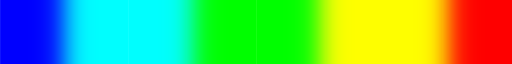

In [18]:
rgb_max_all_cmaps = []
for i in range(HaReBaD_color_matrix_full[:, -1, 1].shape[0]):
    rgb_max_all_cmaps.append(HaReBaD_color_matrix_full[i, -1, :])
all_colormaps = ListedColormap(rgb_max_all_cmaps)

all_colormaps


## Show one of the available among the set of colormaps

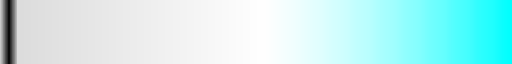

In [19]:
HaReBaD_color_maps_array[200]

## Use HaReBaD colormap to draw some examples

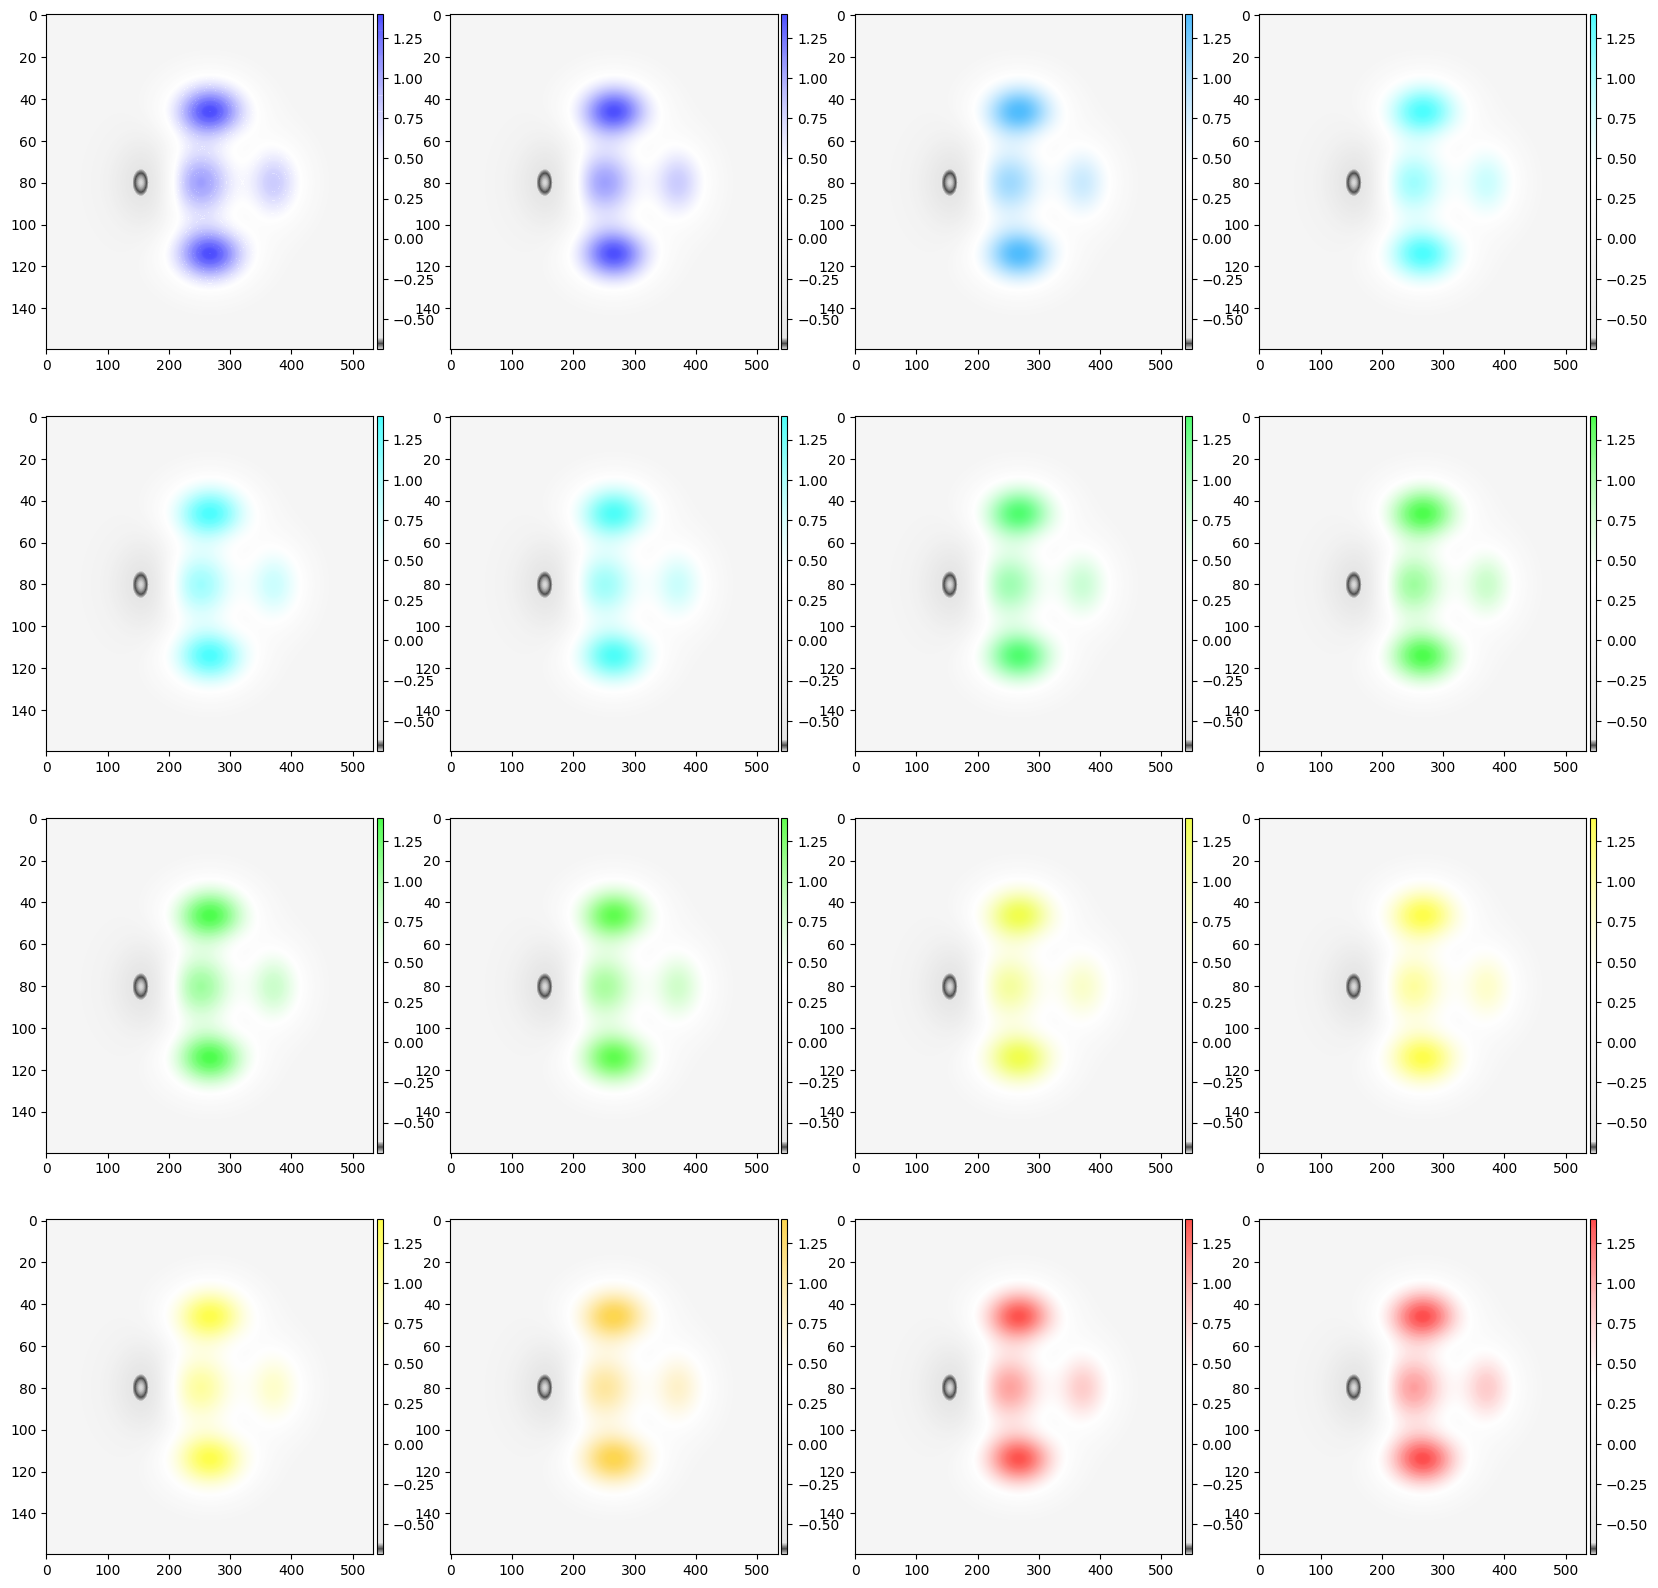

In [20]:
### Now create a color map, using the w value you want 0 = white-red, 765 = white-purple.
f, ax = plt.subplots(4,4, figsize= (20,20))

col = 0
for i, w in enumerate(np.arange(0,HaReBaD_color_matrix_full.shape[0],int(HaReBaD_color_matrix_full.shape[0]/15))):
    
    row = int(i/4)
    if row > 3:
        break
        
    show_individual_example(HaReBaD_color_maps_list[w], ax[row,col])

    col +=1
    if col == 4:
        col = 0  
        

# Save the 3D color matrix to a .npy file

This operation is not necessary here, but it can be usefull if one wants to use the color matrix multiple times and in different conditions, so he does not have to calculate the color matrix multiple times.

Write array to a file as text or binary (default). Data is always written in ‘C’ order, independent of the order of a. The data produced by this method can be recovered using the function fromfile().

In [ ]:
if False:
    HaReMaD_matrix_path = f"HaReBaD_cmatrix_shape-{HaReBaD_color_matrix_full.shape[0]}-{HaReBaD_color_matrix_full.shape[1]}-{HaReBaD_color_matrix_full.shape[2]}.npy"
    HaReBaD_color_matrix_full.tofile(HaReMaD_matrix_path)   

# Load the .npy file

Construct an array from data in a text or binary file. A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.

In [ ]:
if False:
    data_shape = path.split(".")[0].split("_")[-1]
    data_shape = (int(data_shape.split("-")[1]), int(data_shape.split("-")[2]), int(data_shape.split("-")[3]))
    HaReBaD_color_matrix_full = np.fromfile(path)
    HaReBaD_color_matrix_full = HaReBaD_color_matrix_full.reshape(data_shape)
    print(HaReBaD_color_matrix_full.shape)
    